<style>
body {
    font-size: 20pt !important;
}

.rendered_html {
    font-size: 20pt !important;
}

.CodeMirror pre {
    font-size: 20pt !important;
}

.output pre {
    font-size: 20pt !important;
}
</style>


<h2 style="font-size:24pt"> Proyecto DESI</h2>

<h2 style="font-size:24pt"> Julio 4, 2025</h2>

<p style="font-size:16pt">
Data verification using rosette visualizations and a radial distribution histograms


In [45]:
import numpy as np
import matplotlib.tri as mtri
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.cosmology import Planck18
from astropy.io import ascii
import random
from astropy.coordinates import SkyCoord
from astropy import units as u
import pandas as pd

## Data

In [65]:
rosettes = list(range(20))
data = {}
rand = {}

for i, number_rosette in enumerate(rosettes):
    file = f"data_rosette/LRG_{number_rosette}_clustering_data.ecsv"
    table = Table.read(file, format="ascii.ecsv") 
    subset = table[['TARGETID','RA', 'DEC', 'Z','x','y','z']].to_pandas()
    data[f"data_{i}"] = subset  

for i, number_rosette in enumerate(rosettes):
    file = f"data_rosette/LRG_{number_rosette}_clustering_rand.ecsv"
    table = Table.read(file, format="ascii.ecsv")
    subset = table[['TARGETID','RA', 'DEC', 'Z','x','y','z']].to_pandas()
    rand[f"rand_{i}"] = subset

## Rosettes plot

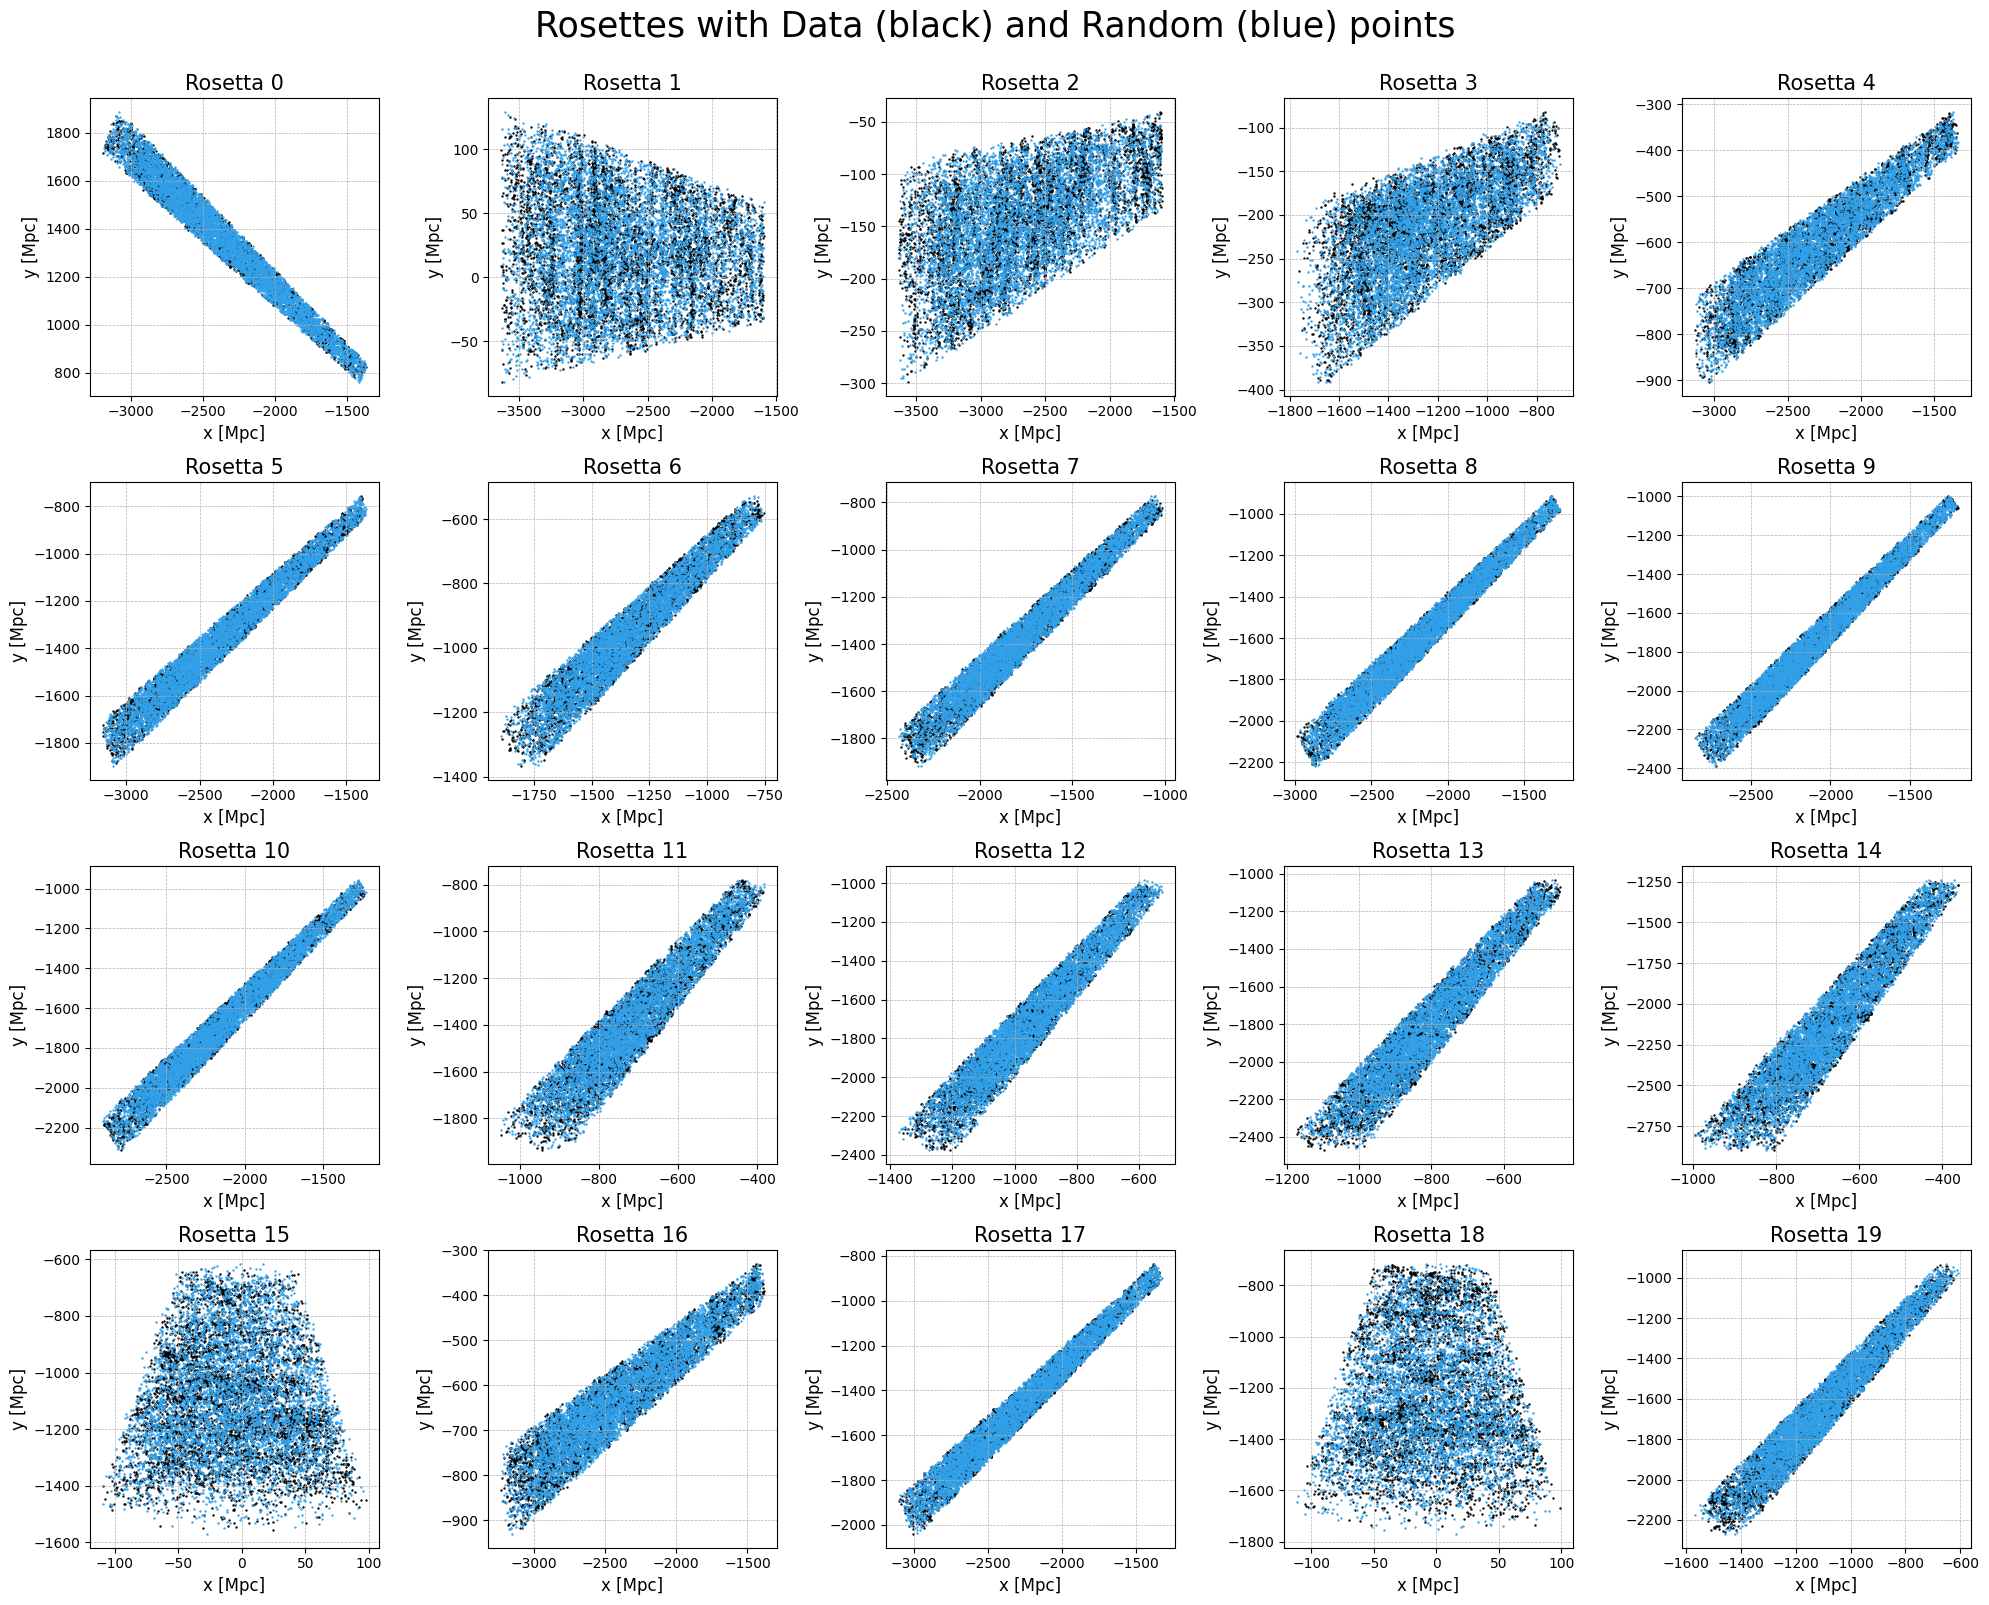

In [132]:
fig, ax = plt.subplots(4, 5, figsize=(20, 16))
axes = ax.flatten()

for i in rosettes:
    
    ax = axes[i]
    data_tri = f"data_{i}"
    rand_tri = f"rand_{i}"
    
    ax.scatter(data[data_tri]['x'], data[data_tri]['y'], c='k', s=0.5)
    ax.scatter(rand[rand_tri]['x'], rand[rand_tri]['y'], c='#32A1EA',s=0.5)
    
    ax.set_title(f'Rosetta {i}',size=15)
    ax.set_xlabel('x [Mpc]',size=12)
    ax.set_ylabel('y [Mpc]',size=12)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

fig.suptitle('Rosettes with Data (black) and Random (blue) points', fontsize=25,y=1)
plt.tight_layout()
plt.show()

## Histogram

In [133]:
for name, table in data.items():
    table['d'] = np.sqrt((table['x']*table['x'])+(table['y']*table['y'])+(table['z']*table['z']))
    
for name, table in rand.items():
    table['d'] = np.sqrt((table['x']*table['x'])+(table['y']*table['y'])+(table['z']*table['z'])) 

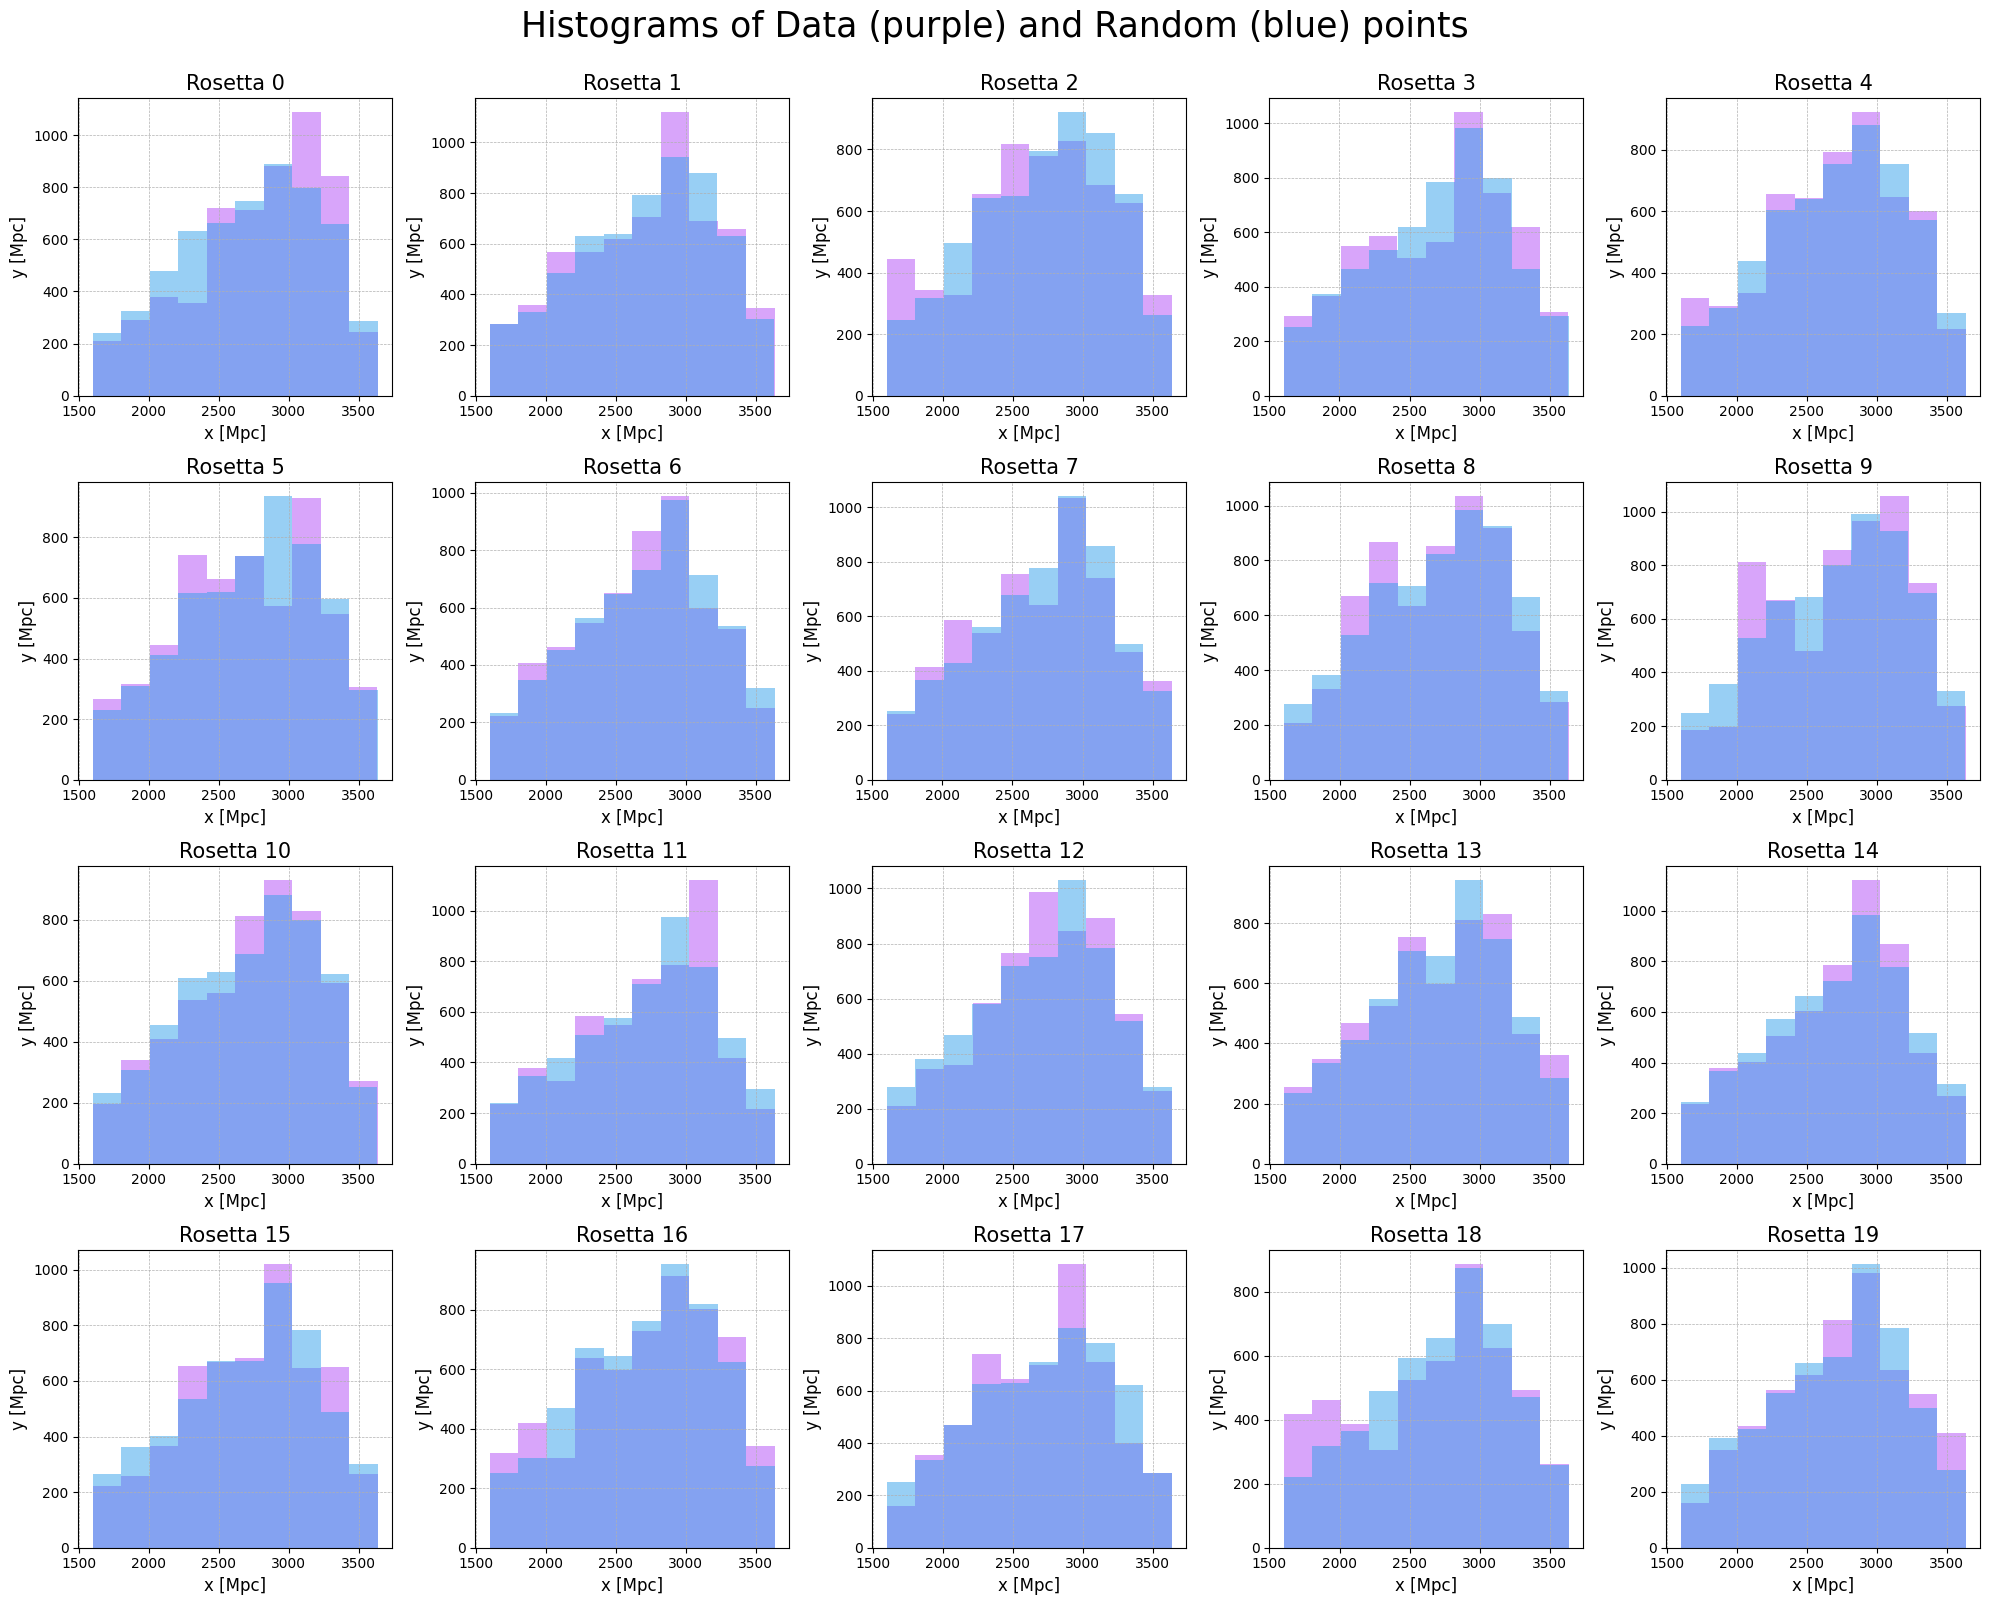

In [141]:
fig, ax = plt.subplots(4, 5, figsize=(20, 16))
axes = ax.flatten()

for i in rosettes:
    
    ax = axes[i]
    data_tri = f"data_{i}"
    rand_tri = f"rand_{i}"
    
    #ax.triplot(tri_dict[data_tri], linewidth=0.2, color='k', zorder=1)
    ax.hist(data[data_tri]['d'],bins=10,color='#b34cf7', alpha=0.5)
    ax.hist(rand[rand_tri]['d'],bins=10,color='#32A1EA', alpha=0.5)
    
    ax.set_title(f'Rosetta {i}',size=15)
    ax.set_xlabel('x [Mpc]',size=12)
    ax.set_ylabel('y [Mpc]',size=12)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

fig.suptitle('Histograms of Data (purple) and Random (blue) points', fontsize=25,y=1)
plt.tight_layout()
plt.show()